# Jugando con series de tiempo

En este Jupyter la idea es revisar algunas cosas básicas sobre series de tiempo

Vamos a usar los datos del clima de Delhi que estan en kaggle (https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importamos los datasets
ruta = ("datasets/Delhi clime/"
        "datasets_312121_636393_DailyDelhiClimateTrain.csv")
df_train = pd.read_csv(ruta)

Exploramos el dataset

In [3]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
date            1462 non-null object
meantemp        1462 non-null float64
humidity        1462 non-null float64
wind_speed      1462 non-null float64
meanpressure    1462 non-null float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Transformamos la fecha a datetime

In [5]:
df_train["date"] = pd.to_datetime(df_train["date"])
print(f"La fecha maxima en el dataset es {df_train['date'].max()}")
print(f"La fecha minima en el dataset es {df_train['date'].min()}")

La fecha maxima en el dataset es 2017-01-01 00:00:00
La fecha minima en el dataset es 2013-01-01 00:00:00


In [6]:
dias = (df_train['date'].max() -
        df_train['date'].min()).total_seconds()/(3600*24)
print(dias)

1461.0


### 1- Graficando las series

Antes de hacer cualquier otra cosa necesitamos saber como son los datos y la mejor forma de saberlo es usando graficos

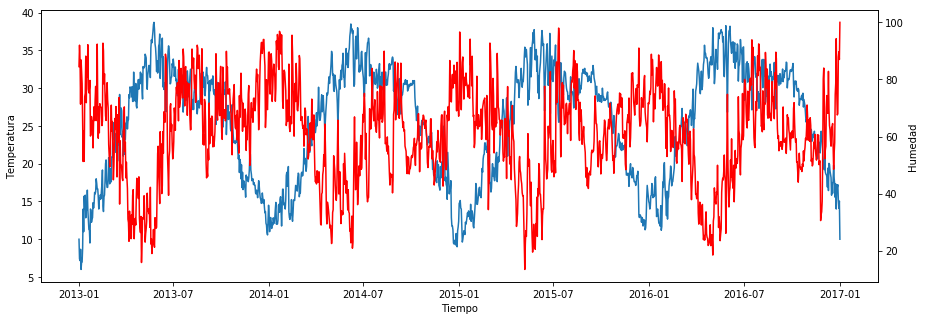

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['date'], df_train['meantemp'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax2 = ax.twinx()
ax2.plot(df_train['date'], df_train['humidity'], c="r")
ax2.set_ylabel('Humedad')
plt.show()

Se ve muycho ruido en los datos, ahora es donde seria util suavizar la curva

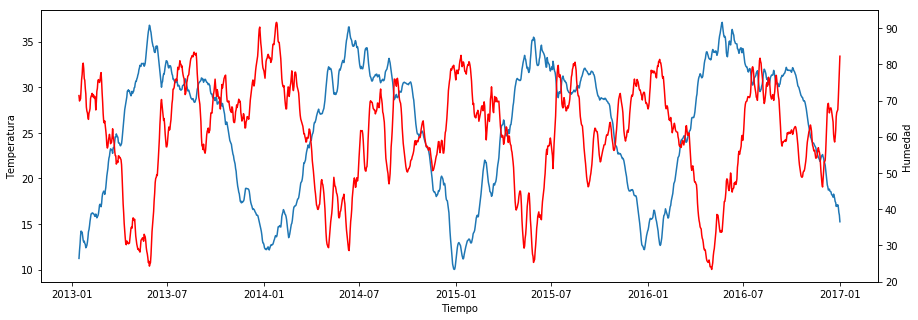

In [18]:
ventana = 10
df_train['meantemp_smooth'] = df_train['meantemp'].rolling(window=ventana).mean()
df_train['humidity_smooth'] = df_train['humidity'].rolling(window=ventana).mean()

# Eliminamos nans
df_train.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['date'], df_train['meantemp_smooth'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax2 = ax.twinx()
ax2.plot(df_train['date'], df_train['humidity_smooth'], c="r")
ax2.set_ylabel('Humedad')
plt.show()

Si lo que queremos es ver como se mueven todos los valores al mismo tiempo

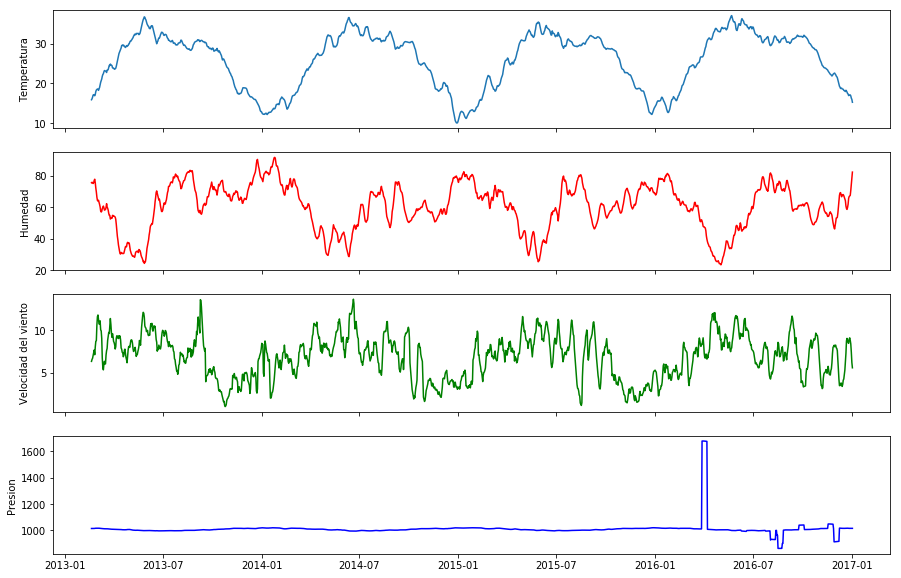

In [22]:
ventana = 10
df_train['wind_speed_smooth'] = df_train['wind_speed'].rolling(window=ventana).mean()
df_train['meanpressure_smooth'] = df_train['meanpressure'].rolling(window=ventana).mean()

# Eliminamos nans
df_train.dropna(inplace=True)

fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
ax[0].plot(df_train['date'], df_train['meantemp_smooth'])
ax[1].plot(df_train['date'], df_train['humidity_smooth'], c="r")
ax[2].plot(df_train['date'], df_train['wind_speed_smooth'], c="g")
ax[3].plot(df_train['date'], df_train['meanpressure_smooth'], c="b")
ax[0].set_ylabel('Temperatura')
ax[1].set_ylabel('Humedad')
ax[2].set_ylabel('Velocidad del viento')
ax[3].set_ylabel('Presion')
plt.show()

Los datos de presion atmosferica muestran una fuerte alza en un periodo en particular. Obtengamos boxplots para los valores.

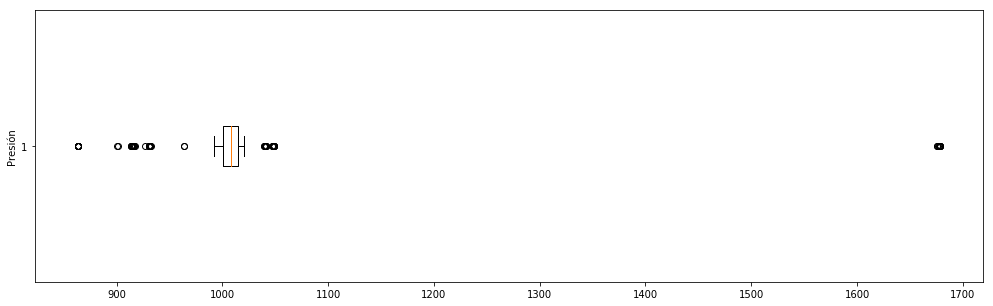

In [27]:
fig, ax = plt.subplots(figsize=(17,5))
ax.boxplot(df_train['meanpressure_smooth'], vert=False)
ax.set_ylabel("Presión")
plt.show()